In [1]:
from astropy.nddata import NDDataArray as nda, StdDevUncertainty as sdu
from astropy.table import Table, column
import astropy.units as u
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

In [2]:
morph_data = Table.read('fits/morph_data.fits')
structure_data = Table.read('fits/structure_data.fits')
hi_data = Table.read('fits/hi_data.fits')

masks = Table.read('fits/masks.fits')
halo_data = Table.read('fits/halo_table_all.fits')
halo_data_w_gas = Table.read('fits/halo_table_all_w_gas.fits')

gz2_data = Table.read('../fits/full_sample_debiased_w_low_z_mod.fits')

In [72]:
has_mendel = structure_data['ok']
disc_error_frac = structure_data['delta_m_b'] / structure_data['m_b']

mendel_ok = np.all([disc_error_frac >= 0,disc_error_frac <= 0.33,
                    has_mendel],axis=0)

axial_ok = morph_data['axial_ratio'] >= 0.75
redshift_ok = morph_data['redshift'] <= 0.04
spiral_ok = np.all([morph_data['p_spiral'] > 0.5,
                    morph_data['N_spiral'] >= 5], axis=0)

m_ok = halo_data['m_hernquist_1R_d'] >= 0

sample_ok = np.all([mendel_ok,axial_ok,redshift_ok,spiral_ok,m_ok],axis=0)

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


In [73]:
print('N_gal = {}'.format(sample_ok.sum()))

for m in range(1,6):
    print('{}: {}'.format(m,(morph_data[sample_ok]['m'] == m).sum()))

N_gal = 795
1: 42
2: 462
3: 122
4: 62
5: 107


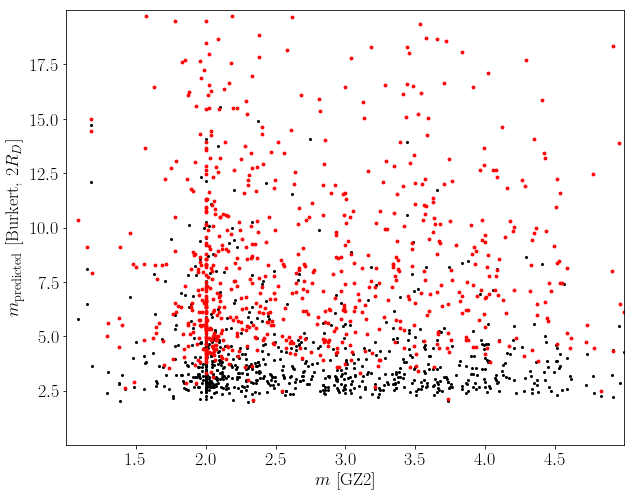

In [77]:
m = morph_data[sample_ok]['m_avg']
m_predicted_burkert = halo_data['m_burkert_2R_d'][sample_ok]
m_predicted_hernquist = halo_data['m_hernquist_2R_d'][sample_ok]

_ = plt.scatter(m,m_predicted_burkert,color='k',s=4)
_ = plt.scatter(m,m_predicted_hernquist,color='r',s=8)

_ = plt.xlim(1,5)
_ = plt.ylim(0,20)

_ = plt.xlabel('$m$ [GZ2]')
_ = plt.ylabel('$m_\mathrm{predicted}$ [Burkert, $2R_D$]')

In [76]:
from scipy.stats import spearmanr
print(spearmanr(m,m_predicted_burkert))
print(spearmanr(m,m_predicted_hernquist))

SpearmanrResult(correlation=-0.094052760074322353, pvalue=0.0079638372482410628)
SpearmanrResult(correlation=0.070570271007548452, pvalue=0.046686758157674882)
